# Tiktok

### Construcción de un modelo para predecir si un vídeo ha sido publicado por un creador baneado.

In [205]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:\\Users\\alvar\\Desktop\\EDA\\Tiktok\\tiktok_dataset.csv")

In [206]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [208]:
print(data.describe())

                  #      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000           0.000000          

In [209]:
print(data.isnull().sum())

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


Las columnas que tienen datos fanulos contienen el mísmo número de  estos

In [210]:
print(data.duplicated().sum())

0


No hay datos duplicados

In [211]:
print(data['claim_status'].value_counts()) # Número de vídeos que tienen estatus de reclamación u opinión
print(data['verified_status'].value_counts()) # Número de videos con estatus verificado o no verificado

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64
verified_status
not verified    18142
verified         1240
Name: count, dtype: int64


Que impacto tienen los vídeos que tienen alerta de reclamación?

Media y mediana del número de visualizaciones 

In [212]:
claims = data[data['claim_status'] == 'claim']
print('Media del número de visualizaciones para reclamacion:', claims['video_view_count'].mean())
print('Mediana del número de visualizaciones para reclmacion:', claims['video_view_count'].median())

Media del número de visualizaciones para reclamacion: 501029.4527477102
Mediana del número de visualizaciones para reclmacion: 501555.0


Que impacto tienen los vídeos que tienen alerta de reclamación?

Media y mediana del número de visualizaciones 

In [213]:
opinions = data[data['claim_status'] == 'opinion']
print('Media del número de visualizaciones para opinion:', opinions['video_view_count'].mean())
print('Mediana del número de visualizaciones para opinion:', opinions['video_view_count'].median())

Media del número de visualizaciones para opinion: 4956.43224989447
Mediana del número de visualizaciones para opinion: 4953.0


In [214]:
print(data['author_ban_status'].value_counts()) # Número de videos con estatus de baneo al autor

author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64


Ahora vamos a conocer en que estado de baneo están los autores de los videos bajo revisión u opinión

In [215]:
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

### Posibles conclusiones

* Los vídeos de reclamaciones se controlan más estrictamente que los vídeos de opinión.
* Los autores deben cumplir una serie de normas más estrictas si publican una reclamación que si publican una opinión.

Además, cabe señalar que no hay forma de saber si los vídeos de afirmación son intrínsecamente más propensos que los vídeos de opinión a dar lugar a la prohibición de autores, o si los autores que publican vídeos de afirmación son más propensos a publicar vídeos que violan los términos del servicio.

Por último, aunque se pueden utilizar estos datos para sacar conclusiones sobre los autores prohibidos/activos, no se pueden sacar conclusiones sobre los vídeos prohibidos. No hay forma de determinar si un vídeo concreto provocó la prohibición, y los autores prohibidos podrían haber publicado vídeos que cumplían con los términos del servicio.

In [216]:
# Que impacto tienen los vídeos que tienen alerta de reclamación?
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [217]:
# Número de veces que se ha compartido un video según el estado de baneo del autor?
print(data.groupby(['author_ban_status']).median(numeric_only=True)[['video_share_count']])
print(data.groupby(['author_ban_status']).mean(numeric_only=True)[['video_share_count']])

                   video_share_count
author_ban_status                   
active                         437.0
banned                       14468.0
under review                  9444.0
                   video_share_count
author_ban_status                   
active                  14111.466164
banned                  29998.942508
under review            25774.696999


Los videos con autores baneados han sido mucho más compartidos en comparación con los que siguen en activo, de hecho, aunque el número de baneados es considerablemente menor, sus videos son mucho más compartidos.

In [218]:
# Que impacto tienen los vídeos cuyos autores han sido baneados?
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

Confirmamos que en todos los casos se cumple que el impacto de los autores en activo tienen mucha menor impacto que los de autores baneados o en revisión.

Los valores de la media en algunos casos son mucho mayores que los de la mediana para los autores que estñan en activo y baneados. Esto quiere decir que la primera mitad de casos hasta la mediana tienen datos con valores menores y que los que se sitúan a la derecha tendrán datos considerablemente mas altos y subirán el valor medio.

In [219]:
# Columna nueva con likes por visualización
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Columna nueva con comentarios por visualización
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Columna nueva con compartidos por visualización
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [220]:
data[["likes_per_view", "comments_per_view", "shares_per_view"]].describe()

,likes_per_view,comments_per_view,shares_per_view
count,19084.000000,19084.000000,19084.000000
mean,0.276093,0.000954,0.054860
std,0.173006,0.001326,0.050597
min,0.000000,0.000000,0.000000
25%,0.130240,0.000098,0.014445
50%,0.264037,0.000455,0.039739
75%,0.398482,0.001268,0.081864
max,0.666648,0.010280,0.265956


In [221]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

Sabemos que los vídeos de reivindicación tienen una tasa de visualización más alta que los vídeos de opinión, pero esto nos indica que los vídeos de reivindicación también tienen una tasa media más alta de «Me gusta», 
por lo que también son mejor recibidos. Además, reciben más interacción a través de comentarios y compartidos que los vídeos de opinión.

Cabe señalar que, en el caso de los vídeos de reivindicación, los autores prohibidos tienen índices de «Me gusta»/visualizaciones y de compartidos/visualizaciones ligeramente superiores a los de los autores activos o los que están en proceso de revisión. 
Sin embargo, en el caso de los vídeos de opinión, tanto los autores activos como los que están en proceso de revisión obtienen índices de interacción más altos que los autores prohibidos en todas.

### EDA

## Exploración

In [222]:
print("Tamaño del dataset:", data.size)
print("Dimensiones del dataset:", data.shape)
print("Tipos de datos del dataset:\n", data.dtypes)

Tamaño del dataset: 290730
Dimensiones del dataset: (19382, 15)
Tipos de datos del dataset:
 #                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
likes_per_view              float64
comments_per_view           float64
shares_per_view             float64
dtype: object


In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

col=["video_duration_sec", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "likes_per_view", "comments_per_view", "shares_per_view"]

def boxplots_todas_columnas(df, col, orientacion="v", tamaño=(12, 6)):
    """
    Representa boxplots de varias columnas numéricas en una sola figura.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame de entrada
    columnas : list
        Lista de columnas numéricas a representar
    orientacion : str
        'v' para boxplots verticales (por defecto), 'h' para horizontales
    tamaño : tuple
        Tamaño de la figura (ancho, alto)
    """
    
    # Pasar a formato largo (melt)
    df_melt = df[col].melt(var_name="Variable", value_name="Valor")
    
    plt.figure(figsize=tamaño)
    if orientacion == "v":
        sns.boxplot(x="Variable", y="Valor", data=df_melt)
        plt.xticks(rotation=45)
    else:
        sns.boxplot(y="Variable", x="Valor", data=df_melt)
    
    plt.title("Boxplots de variables numéricas")
    plt.tight_layout()
    plt.show()

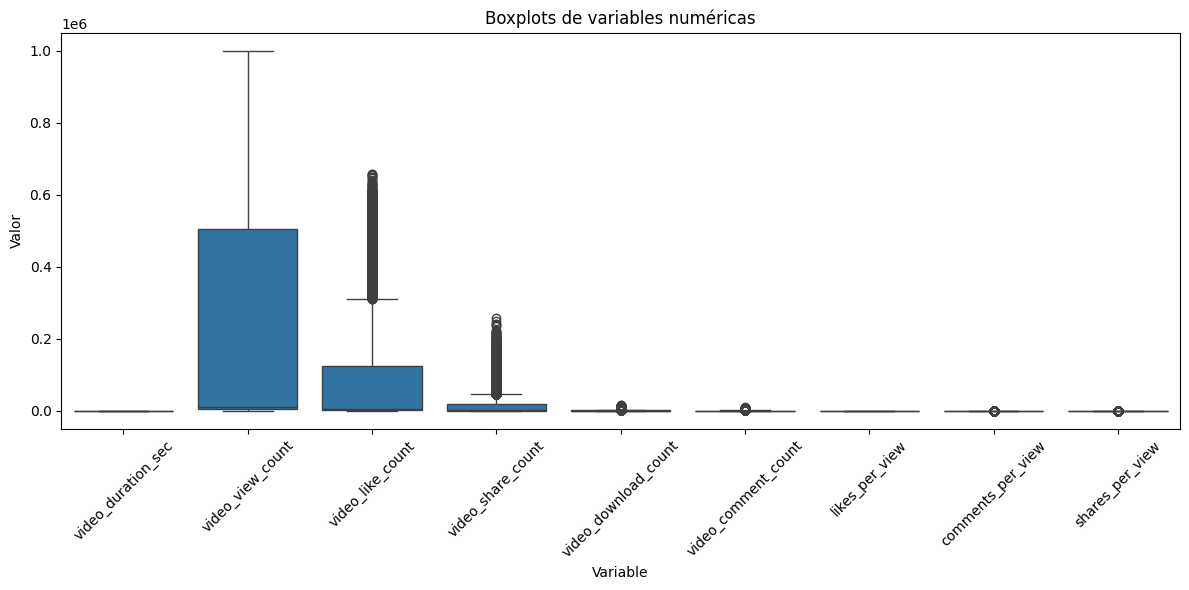

In [224]:
boxplots_todas_columnas(data, col, orientacion="v", tamaño=(12, 6))


Dentro de los rangos del gráfico de caja vemos que en recuento de likes y en número de vídeos compartidos hay valores extremos. Esto no es de extrañar, porque siempre hay contenido que se vuelve mas viral.

## Visualizaciones

Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map

Conocer la distribución de los datos nos ayuda a saber como trabajar con los datos y a escoger los modelos a emplear.

### Distribución de duración de los videos.

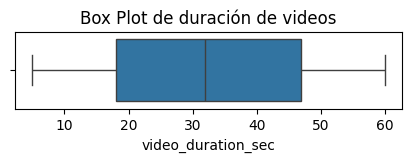

In [225]:
plt.figure(figsize=(5,1))
plt.title('Box Plot de duración de videos')
sns.boxplot(x=data['video_duration_sec']);

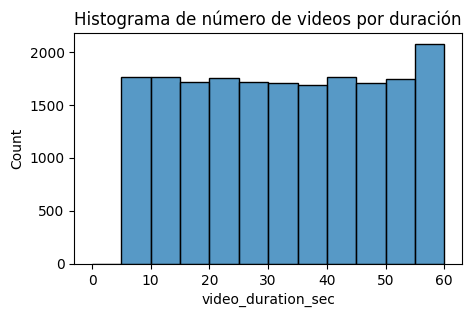

In [226]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Histograma de número de videos por duración');

La duración de los vídeos están entre 5 y 60 segundos. Su distribución es uniforme

### Distribución de visualizaciones.

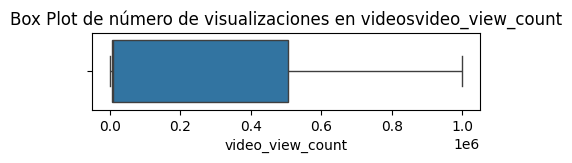

In [227]:
plt.figure(figsize=(5, 1))
plt.title('Box Plot de número de visualizaciones en videosvideo_view_count')
sns.boxplot(x=data['video_view_count']);

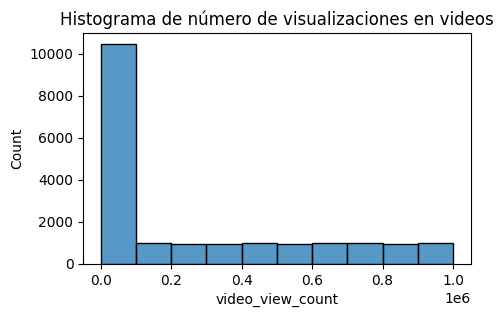

In [228]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Histograma de número de visualizaciones en videos');

La mayoría de los videos tienen menos de 100.000 visualizaciones, pero a partir de 100.000 el número de videos con x número de visualizaciones es similar.

### Distribución de Likes.

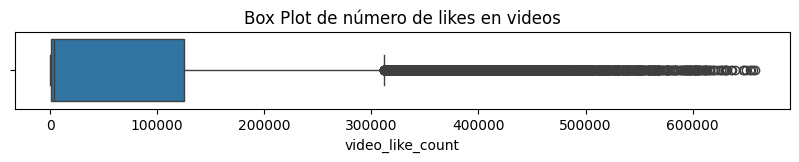

In [229]:
plt.figure(figsize=(10,1))
plt.title('Box Plot de número de likes en videos')
sns.boxplot(x=data['video_like_count']);

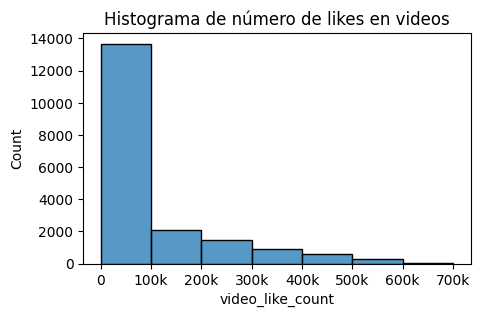

In [230]:
plt.figure(figsize=(5,3))
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Histograma de número de likes en videos');

La mayoría de los vídeos tienen entre 0 y 100.000 Likes y cada vez hay menos vídeos con un número mayor de likes.

Videos con comentarios

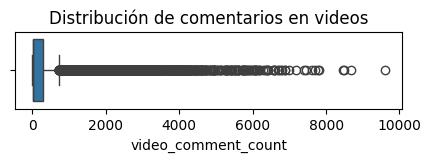

In [231]:
plt.figure(figsize=(5,1))
plt.title('Distribución de comentarios en videos')
sns.boxplot(x=data['video_comment_count']);

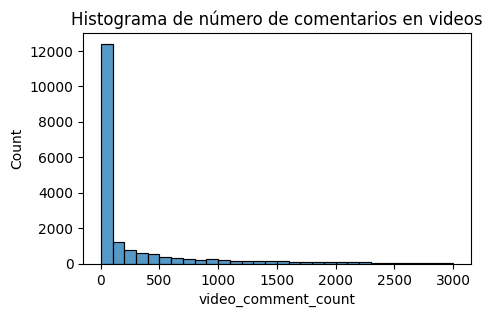

In [232]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Histograma de número de comentarios en videos');

La mayoría de los casos tienen pocos comentarios y cada vez hay menos conforme aumenta el número de comentarios.

Videos compartidos.

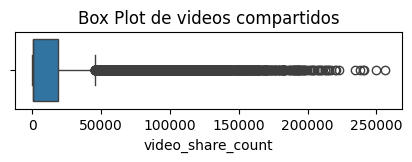

In [233]:
plt.figure(figsize=(5,1))
plt.title('Box Plot de videos compartidos')
sns.boxplot(x=data['video_share_count']);

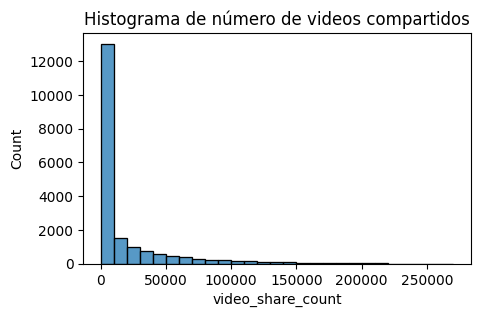

In [234]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Histograma de número de videos compartidos');

La gran mayoría de vídeos no se han compartido mas de 10.000 veces

Descargas

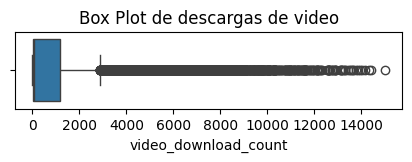

In [235]:
plt.figure(figsize=(5,1))
plt.title('Box Plot de descargas de video')
sns.boxplot(x=data['video_download_count']);

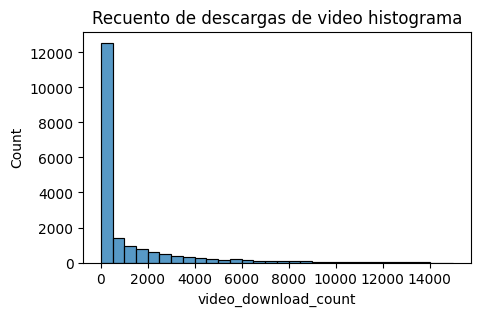

In [236]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Recuento de descargas de video histograma');

La mayoría de los videos no superan las 500 descargas

En todos los casos anteriores la distribuvión está muy desplazada hacia la derecha.

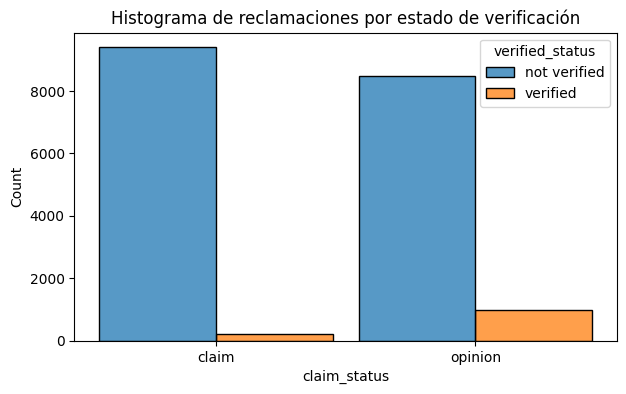

In [237]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Histograma de reclamaciones por estado de verificación');

La gran parte de los videos todavía no se han verificado. De los que si han sido verificados la mayoría son de opinión.

### Estado de las reclamaciones en función del estado de baneo de los autores.

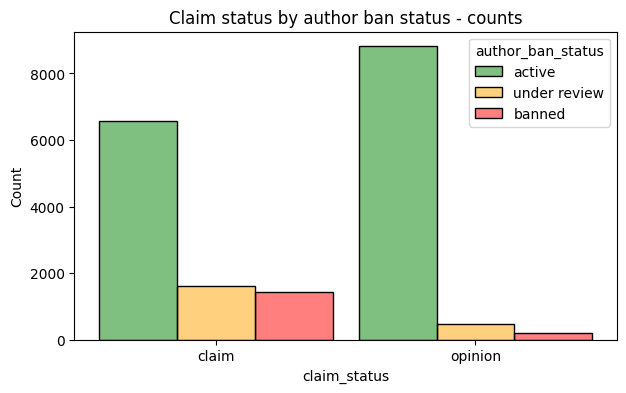

In [238]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

La mayoría de autores con vídeos bajo reclamación están en activo, siendo mas numeroso el grupo de videos de opinión. Los que están bajo revisión y baneados están en segundo y tercer lugar y son mas numerosos en los videos de reclamaciones

### Visualizaciones medias por estado de baneo

C:\Users\alvar\AppData\Local\Temp\ipykernel_22076\3340194109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


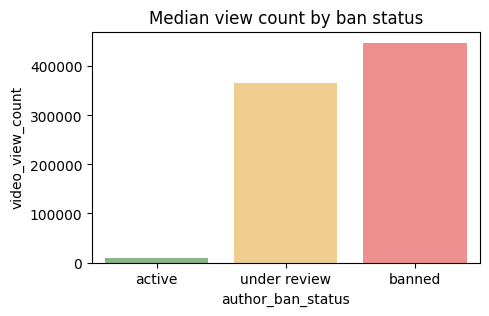

In [239]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

### Visualizaciones medias por estado de baneo

## Conclusiones

El recuento medio de visualizaciones de los autores no activos es muchas veces superior al recuento medio de visualizaciones de los autores activos. Dado que se sabe que los autores no activos son más propensos a publicar reclamaciones y que los vídeos de los autores no activos obtienen muchas más visualizaciones en conjunto que los vídeos de los autores activos, entonces «video_view_count» podría ser un buen indicador del estado de las reclamaciones.

In [240]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

El número de visalizaciones medio agrupado de videos de reclamaciones es considerablemente más alto que el de videos de opinión.

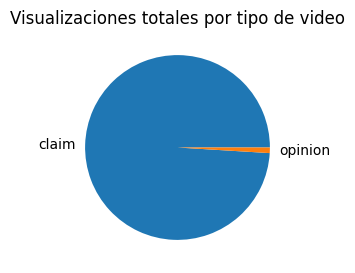

In [241]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Visualizaciones totales por tipo de video');

In [242]:
data["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

Aunque en el dataset original hay el mismo número de videos, la mayoría de visualizaciones son de vídeos de reclamaciones.

## Outliers

Si intentaras predecir el número de visualizaciones de un vídeo concreto, los vídeos con un número de visualizaciones extremadamente alto podrían introducir un sesgo en el modelo. Además, algunos valores atípicos podrían indicar problemas en la forma en que se capturaron o registraron los datos. 

Los datos presentan distribuciones muy desplazadas hacia la derecha y valores muy superiores a la media, habrá que trabajarlos con especial atención.

El objetivo final del proyecto TikTok es crear un modelo que prediga si un vídeo es una afirmación o una opinión. El análisis que ha realizado indica que el nivel de interacción de un vídeo está fuertemente correlacionado con su estado de afirmación. No hay motivos para creer que alguno de los valores de los datos de TikTok se haya capturado de forma errónea, y se ajustan a las expectativas de cómo funcionan las redes sociales: una proporción muy pequeña de vídeos obtiene niveles de interacción muy altos. Esa es la naturaleza del contenido viral.

Has aprendido que una forma habitual de determinar los valores atípicos en una distribución normal es calcular el rango intercuartílico (IQR) y establecer un umbral que sea 1,5 * IQR por encima del tercer cuartil.

En este conjunto de datos de TikTok, los valores de las variables de recuento no siguen una distribución normal. Están muy sesgados hacia la derecha. Una forma de modificar el umbral de valores atípicos es calcular el valor **mediano** de cada variable y luego añadir 1,5 * IQR. Esto da como resultado un umbral que, en este caso, es mucho más bajo que si se utilizara el tercer cuartil.

In [243]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Recueto de outliers
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


In [244]:
data.shape

(19382, 15)

El recuento de ouliers es considerable teniendo en cuenta el tamaño del dataset.

### Análisis exploratorio 

Aplicaremos estadística descriptiva e inferencial, distribución de probabilidades y test de hipótesis. Del análisis exploratorio anterior podemos plantearnos varias preguntas que podemos tratar de aplicar un test de hipótesis. 

-Los vídeos de cuentas verificadas tienen diferente número medio de visualizaciones?
-Existe una relación entre el número de visualizaciones medias de las cuentas en proceso de verificación de las que están asociadas?

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [246]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [247]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,0.276093,0.000954,0.054860
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,0.173006,0.001326,0.050597
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,0.130240,0.000098,0.014445
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,0.264037,0.000455,0.039739
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,0.398482,0.001268,0.081864
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,0.666648,0.010280,0.265956


In [248]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
likes_per_view              298
comments_per_view           298
shares_per_view             298
dtype: int64

Las variables que tienen valores faltantes tienen el mismo número de estos, vamos a eliminar todas las filas que tengan valores faltantes.

Nos interesa la relación entre estado de verificación del autor del video y el número de visualizaciones.

In [249]:
data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [250]:
data = data.dropna(axis=0)

### Test de hipótesis

H0: La hipótesis nula es que no existen difetrencias estadísticamente significativas entre la media de visualizaciones entre el grupo de autores con el perfil verificado o no verificado.

H1: La hipótesis alternativa dice que hay diferencia estadísticamente significativa entre la media de visualizaciones de los videos cuyos autores tienen el perfil verificado o no.

Para una prueba binaria vamos a aplicar un test-t.

In [251]:
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

p-valor = 2.61 * 10^-120. 

p-valor <<0.05 

El p-valor es mucho menor que el nivel de significación escogido para realizar la prueba. Podemos afirmar que existen diferencias estadísticamente significarivas entre los grupos 

El análisis muestra que existe una diferencia estadísticamente significativa en el promedio de visualizaciones entre los vídeos de cuentas verificadas y los de cuentas no verificadas.

Sería interesante investigar la causa fundamental de esta diferencia de comportamiento. 

¿las cuentas no verificadas tienden a publicar más vídeos sensacionalistas?
 
¿O las cuentas no verificadas están asociadas a bots de spam que ayudan a inflar el número de visualizaciones?

El siguiente paso será construir un modelo de regresión sobre verified_status. Un modelo de regresión es el siguiente paso natural, ya que el objetivo final es hacer predicciones sobre el estado de las reclamaciones. Un modelo de regresión para verified_status puede ayudar a analizar el comportamiento de los usuarios de este grupo de usuarios verificados. Nota técnica para preparar el modelo de regresión: dado que los datos están sesgados y existe una diferencia significativa en los tipos de cuentas, será fundamental construir un modelo de regresión logística.

### Clasificación por regresión.

El equipo de datos está trabajando en un modelo de ML que permita clasifiar un vídeo en función si su contenido es una crítica o contiene una opinión. Si el modelo predice eficazmente, entonces TikTok podrá reducir el retraso a la hora de resolver las denuncias de los usuarios y priorizarlas de manera más eficaz.

Se nos pide que creemos un modelo de regreión logística, usando como variable objetivo el estado de verificación.

## Regresión logística.

In [252]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [253]:
data.duplicated().sum()

np.int64(0)

Ya hemos realizado la eliminación de outliers para las variables: 'video_view_count', 'video_like_count', 'video_share_count''video_download_count', 'video_comment_count'

Vamos a comprobar la cantidad de casos que hay para los dos supuestos de la variable objetivo. Encontramos que está muy desvalanceado. El 93.7% no han sido verificados, mientras que el 6,3% si lo han sido

In [254]:
print(data["verified_status"].value_counts(normalize=True))
print(data["verified_status"].value_counts())

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64
verified_status
not verified    17884
verified         1200
Name: count, dtype: int64


Para poder entrenar el modelo de manera correcta vamos a balancear los datos aplicando oversampling de la calase minoritaria.

In [255]:
# Dividimos las clases
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Oversampling de la clase minoritaria
data_minority_upsampled = resample(data_minority,
                                 replace=True,
                                 n_samples=len(data_majority),
                                 random_state=0)

# Combinamos los datos de vuelta
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Recuento de las clases
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Se crea una función para calcular la longitud de los textos para cada variable (verificado y no verificado).

In [256]:
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Añadimos una columna con la longitud en caracteres de cada video al dataframe.

In [257]:
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


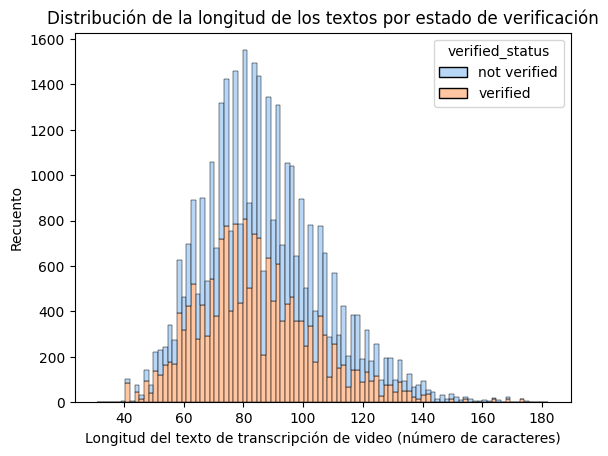

In [258]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("Longitud del texto de transcripción de video (número de caracteres)")
plt.ylabel("Recuento")
plt.title("Distribución de la longitud de los textos por estado de verificación")
plt.show()

Para comprender la relación entre las variables vamos a realizar una matriz de correlación para las variables numéricas.

In [259]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.282755,-0.311144,-0.214349,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.005539,0.005954,-0.001698,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.003731,-0.021063,0.001244,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.278638,0.292290,0.204884,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.571864,0.437756,0.404701,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.485643,0.389892,0.594859,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.476817,0.600509,0.343180,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.409255,0.748841,0.307483,0.149750
likes_per_view,-0.282755,-0.005539,-0.003731,0.278638,0.571864,0.485643,0.476817,0.409255,1.000000,0.539845,0.675187,0.094428
comments_per_view,-0.311144,0.005954,-0.021063,0.292290,0.437756,0.389892,0.600509,0.748841,0.539845,1.000000,0.394044,0.114497


Para observar mejor la relación entre las variables mas importantes eliminamos la variable con el número de fila,  'video_id', 'comments_per_view', 'likes_per_view', 'shares_per_view', 

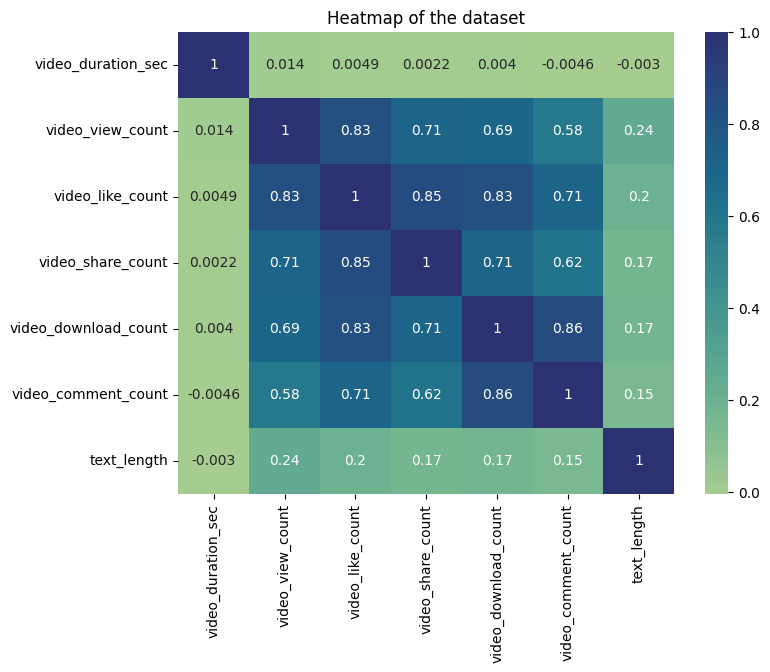

In [260]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

Observamos que existe mucha colinearidad entre el número de likes por vídeo y el número de visitas por vídeo. Y de estas dos variables la que mas correlación tiene con las demas es 'video_likes_count', así que la eliminamos del modelo.

### Selección de variables.

In [261]:
y = data_upsampled["verified_status"]
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### Construcción de los datasets de entrenamiento y test.

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [263]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [264]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [265]:
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [266]:
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

Para poder introducir estas variables categóricas al modelo debemos codificarlas mediante one-hot encoding.

In [267]:
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [268]:
# Definición del codificador y a continuación aplicarlo al dataset de variables categóricas.
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [269]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [270]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [271]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(26826, 3))

In [272]:
# reación de un dataframe con los datos codificados
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [273]:
# Eliminar las columnas categóricas originales del dataframe de entrenamiento
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


Volver a unir el dataframe de variables numéricas con las variables codificadas.

In [274]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [275]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

La variable objetivo es de tipo objeto, será necesario codificarla para hacerlla numérica.

In [276]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [277]:
##Ajustar la forma de y_train antes de pasarlo a .fit_transform(), ya que este método recibe un array 2D.

## Usar .ravel() para aplanar el arreglo devuelto por .fit_transform(), de modo que pueda usarse más adelante para entrenar el modelo.
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

y_train_final

array([1., 1., 1., ..., 1., 1., 0.], shape=(26826,))

# Costrucción del modelo. Regresión logística

In [278]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

Hay que codificar las variables categóricas en el set de test empleando un modelo apropiado.

In [279]:
# Seleccionar las variables
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [280]:
# Transformar las variables empleando el codificador ajustado con los datos de entrenamiento
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(8942, 3))

In [ ]:
# Añadir los nombres de los datos codificados como nombres de columnas en un dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [284]:
# Hay que eliminar las columnas categóricas originales del dataframe de test
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,1789.0
5727,19,792813.0,56597.0,5146.0,3413.0
11607,54,2044.0,68.0,19.0,2.0


Unificar las variables numéricas y categóricas codificadas de test para entrenar al modelo final.

In [285]:
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,1789.0,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,3413.0,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [286]:
y_pred = log_clf.predict(X_test_final)

In [287]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.], shape=(8942,))

In [288]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Para poder comparar las etiquetas de test habrá que codificarlas.

In [ ]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.], shape=(8942,))

Confirmar que las dimensiones de entrenamiento y test están en alineamiento desde que fueron añadidas variables adicionales.

In [290]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

# Visualización de resultados

Matriz de confusión

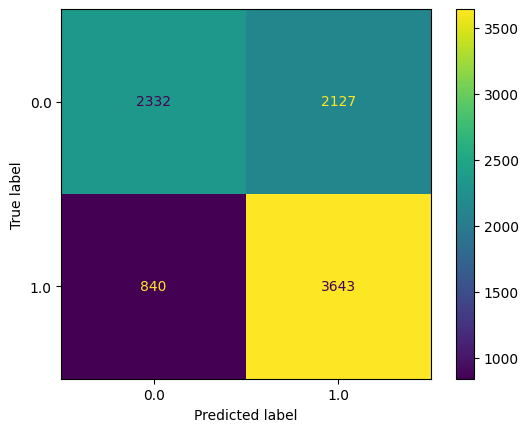

In [ ]:
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot()

# Mostrar la matriz de confusión
plt.show()

El cuadrante superior izquierdo muestra el número de vídeos publicados por cuentas no verificadas que el modelo clasificó correctamente como tales.

El cuadrante superior derecho muestra el número de vídeos publicados por cuentas no verificadas que el modelo clasificó erróneamente como publicados por cuentas verificadas.

El cuadrante inferior izquierdo muestra el número de vídeos publicados por cuentas verificadas que el modelo clasificó erróneamente como publicados por cuentas no verificadas.

El cuadrante inferior derecho muestra el número de vídeos publicados por cuentas verificadas que el modelo clasificó correctamente como tales.

Métricas de evaluación para las predicciones.

Precision (precisión): de todos los casos que el modelo predijo como positivos, qué proporción realmente lo eran.

Recall (sensibilidad o exhaustividad): de todos los casos que eran realmente positivos, qué proporción detectó el modelo.


F1-score: media armónica entre precisión y recall, usada para equilibrar ambas métricas.
	​


In [292]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.81      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.68      0.67      0.66      8942
weighted avg       0.68      0.67      0.66      8942



Las métricas de clasificación para la regresión logística fueron 63%, un recall de 82% y un f1-score de 71% para clasificar el caso "no verificado"

El caso "verificado" tiene su propias métricas.

### Interpretar los coeficientes del modelo

In [293]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-3.163476e-03
1,video_view_count,-2.492389e-07
2,video_share_count,4.816601e-06
3,video_download_count,-1.746539e-04
4,video_comment_count,3.343329e-04
5,claim_status_opinion,1.486793e+00
6,author_ban_status_banned,-5.447737e-01
7,author_ban_status_under review,-4.037360e-01


# Conclusión

- Según el modelo de regresión logística, cada segundo adicional del vídeo se asocia con un aumento de 0,009 en la probabilidad logarítmica de que el usuario tenga un estado verificado.
- El modelo de regresión logística no tenía un gran poder predictivo, pero era aceptable: una precisión del 61 % no es ideal, pero una recuperación del 84 % es muy buena. La precisión general se sitúa en el extremo inferior de lo que normalmente se consideraría aceptable. 

Según los coeficientes estimados del modelo a partir de la regresión logística, los vídeos más largos tienden a estar asociados con una mayor probabilidad de que el usuario esté verificado. Otras características del vídeo tienen coeficientes estimados pequeños en el modelo, por lo que su asociación con el estado verificado parece ser pequeña.